# Modelo predictivo
## Precio de Venta de Inmuebles en AMBA (2020)

Objetivos:
- Realizar un analisis exploratorio del dataset.
- Determinar las variables que influyen en el precio del inmueble
- Hacer un estudio rapido del mercado inmobiliario

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selección del DataSet

El dataset original contiene información de propiedades a la venta en Gran Buenos Aires, obtenido a partir de los registros en la plataforma web Properati (https://properati.com.ar/data/). Este dataset se encuentra publicado en Kaggle (https://kaggle.com/datasets/alejandromendivil/bsas-realstate-on-sale
).

Fue seleccionado por sobre otros datasets, como el proporcionado por el Gobierno de la Ciudad de Buenos Aires (db_2) y un dataset publicado por la comunidad (db_1), ya que estos presentaban inconsistencias que perjudicarían al modelo.

Datos proporcionados por el Gobierno de la Ciudad:

- Este dataset contaba con pocas columnas, lo que implicaba que el modelo no tendría suficientes parámetros para inferir el precio del inmueble. Y sus datos de "precios" se encontraban preprocesados, lo que nos daba una columna con precios promedios por barrios en diferentes años. Esto, sumado a que el dataset era poco legible, concluyó en su descarte para el proyecto.

Datos de la comunidad:

- Este dataset público, si bien contaba con más información por inmueble y un gran número de datos registrados, estaba con un formato poco legible, con columnas inconsistentes (2 columnas de precios en dólares y 2 de precios en pesos) y lo que terminó sentenciando su descarte fue encontrar inmuebles con precios que no se ajustan a la realidad, por lo que el dataset perdió completamente la legitimidad (alquileres a 9.000 dólares el mes, por ejemplo).

In [7]:
data = pd.read_csv(r"data\db_AMBA.csv", sep=",")

data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


# Analisis Exploratorio

In [8]:
# Veamos las columnas con las que contamos y ajustemos sus nombres para mayor comodidad
# Ademas veamos las dimenciones del dataset

print("Columnas Originales:")
print(data.columns)

data.columns = ['fecha_inicio', 'fecha_fin', 'fecha_creacion', 'lat', 'lon', 'pais', 'provincia', 'ciudad',
 'ambientes', 'dormitorios', 'baños', 'superficie_total', 'superficie_cubierta',
 'precio', 'moneda', 'titulo', 'descripcion', 'tipo_propiedad', 'tipo_operacion']

print("Columnas nuevas:")
print(data.columns)

print("#Columnas: ", data.shape[1], "\n#Filas:", data.shape[0])

Columnas Originales:
Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')
Columnas nuevas:
Index(['fecha_inicio', 'fecha_fin', 'fecha_creacion', 'lat', 'lon', 'pais',
       'provincia', 'ciudad', 'ambientes', 'dormitorios', 'baños',
       'superficie_total', 'superficie_cubierta', 'precio', 'moneda', 'titulo',
       'descripcion', 'tipo_propiedad', 'tipo_operacion'],
      dtype='object')
#Columnas:  19 
#Filas: 146660


In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha_inicio         146660 non-null  object 
 1   fecha_fin            146660 non-null  object 
 2   fecha_creacion       146660 non-null  object 
 3   lat                  136735 non-null  float64
 4   lon                  136701 non-null  float64
 5   pais                 146660 non-null  object 
 6   provincia            146660 non-null  object 
 7   ciudad               146660 non-null  object 
 8   ambientes            146660 non-null  float64
 9   dormitorios          146660 non-null  float64
 10  baños                140703 non-null  float64
 11  superficie_total     126133 non-null  float64
 12  superficie_cubierta  125046 non-null  float64
 13  precio               146660 non-null  float64
 14  moneda               146660 non-null  object 
 15  titulo           

In [10]:
data.isnull().sum()

fecha_inicio               0
fecha_fin                  0
fecha_creacion             0
lat                     9925
lon                     9959
pais                       0
provincia                  0
ciudad                     0
ambientes                  0
dormitorios                0
baños                   5957
superficie_total       20527
superficie_cubierta    21614
precio                     0
moneda                     0
titulo                     0
descripcion                0
tipo_propiedad             0
tipo_operacion             0
dtype: int64

In [11]:
data = data.dropna(subset=['superficie_cubierta', 'superficie_total', 'baños'])


In [12]:
data.describe()

,lat,lon,ambientes,dormitorios,baños,superficie_total,superficie_cubierta,precio
count,114488.000000,114488.000000,122818.000000,122818.000000,122818.000000,122818.000000,122818.000000,1.228180e+05
mean,-34.598315,-58.462856,3.130950,2.068345,1.591648,191.389650,112.118582,2.441321e+05
std,0.095430,0.140075,1.394685,1.084066,0.879062,1490.906401,898.847733,2.999523e+05
min,-35.150806,-59.042416,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.620238,-58.499527,2.000000,1.000000,1.000000,52.000000,47.000000,1.150000e+05
50%,-34.598219,-58.443019,3.000000,2.000000,1.000000,78.000000,68.000000,1.700000e+05
75%,-34.571633,-58.410219,4.000000,3.000000,2.000000,138.000000,108.000000,2.690000e+05
max,-34.159732,-57.805832,35.000000,15.000000,14.000000,169000.000000,126062.000000,3.243423e+07


In [13]:
data.corr(numeric_only=True)

,lat,lon,ambientes,dormitorios,baños,superficie_total,superficie_cubierta,precio
lat,1.000000,-0.698515,-0.064708,-0.042450,0.092947,-0.016133,-0.004370,0.091484
lon,-0.698515,1.000000,-0.019355,-0.040154,-0.073784,-0.047335,-0.014008,0.037808
ambientes,-0.064708,-0.019355,1.000000,0.910966,0.611770,0.101696,0.075844,0.399234
dormitorios,-0.042450,-0.040154,0.910966,1.000000,0.620735,0.096344,0.073011,0.379987
baños,0.092947,-0.073784,0.611770,0.620735,1.000000,0.079172,0.069271,0.558982
superficie_total,-0.016133,-0.047335,0.101696,0.096344,0.079172,1.000000,0.412752,0.044137
superficie_cubierta,-0.004370,-0.014008,0.075844,0.073011,0.069271,0.412752,1.000000,0.049255
precio,0.091484,0.037808,0.399234,0.379987,0.558982,0.044137,0.049255,1.000000


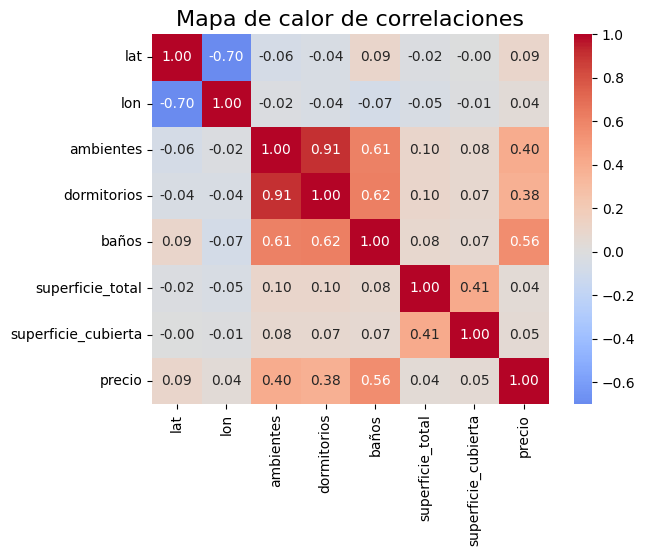

In [15]:
# Contratio a lo que uno pensaria vemos una correlacion mas fuerte del precio con el numero de baños que con
# metros cuadrados o cantidad de ambientes


plt.figure()
sns.heatmap(data.corr(numeric_only=True),  
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f")

plt.title("Mapa de calor de correlaciones", fontsize=16)
plt.show()

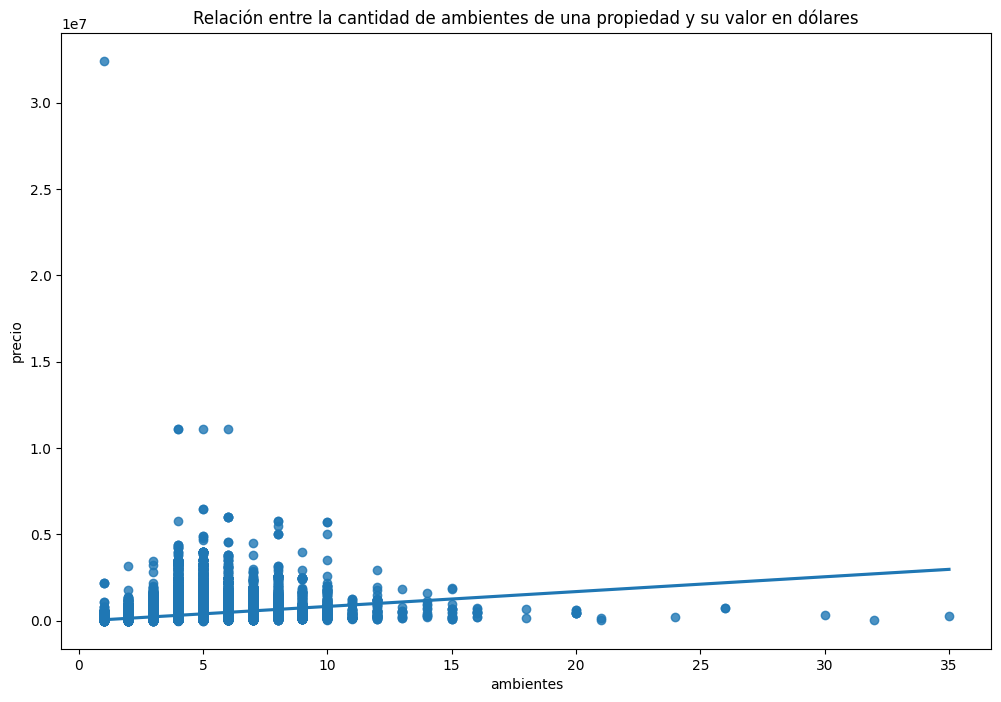

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x="ambientes",y="precio",data=data[["ambientes", "precio"]])
plt.title("Relación entre la cantidad de ambientes de una propiedad y su valor en dólares")
plt.show()

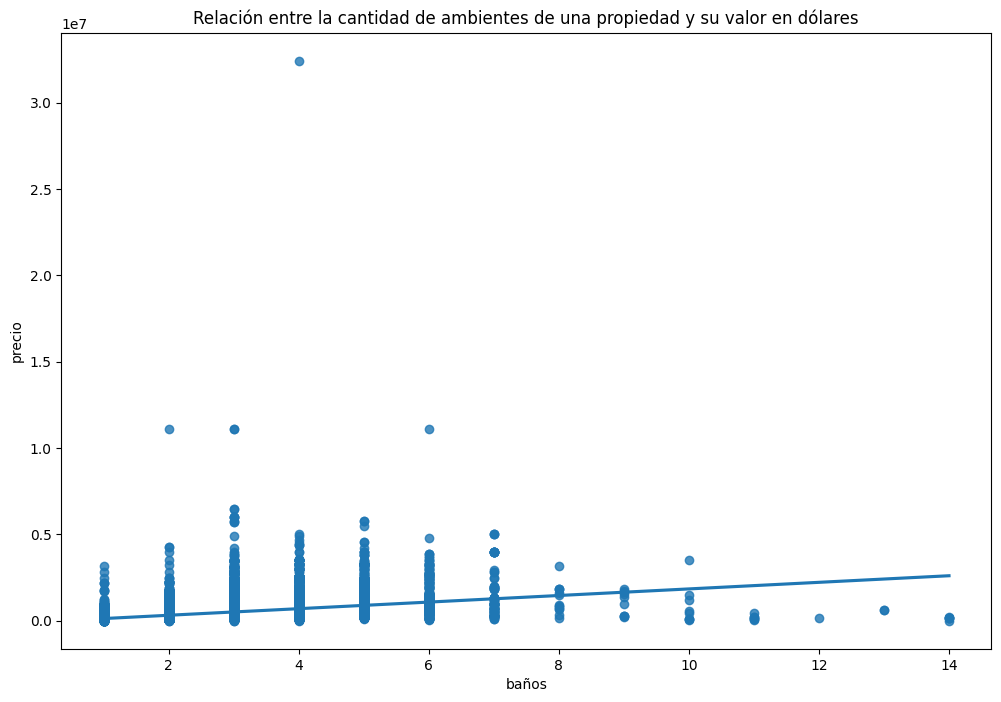

In [17]:
plt.figure(figsize=(12,8))
sns.regplot(x="baños",y="precio",data=data[["baños", "precio"]])
plt.title("Relación entre la cantidad de ambientes de una propiedad y su valor en dólares")
plt.show()

In [83]:
data["provincia"].unique()


array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste'],
      dtype=object)

In [100]:
data_caba = data[data["provincia"] == "Capital Federal"]
data_caba_media=data_caba.groupby(['ciudad'])['precio'].mean().sort_values(ascending=True)


data_pba = data[data["provincia"] != "Capital Federal"]
data_pba_media=data_pba.groupby(['ciudad'])['precio'].mean().sort_values(ascending=True)


data_sur = data[data["provincia"] == "Bs.As. G.B.A. Zona Sur"]
data_norte = data[data["provincia"] == "Bs.As. G.B.A. Zona Norte"]
data_oeste = data[data["provincia"] == "Bs.As. G.B.A. Zona Oeste"]




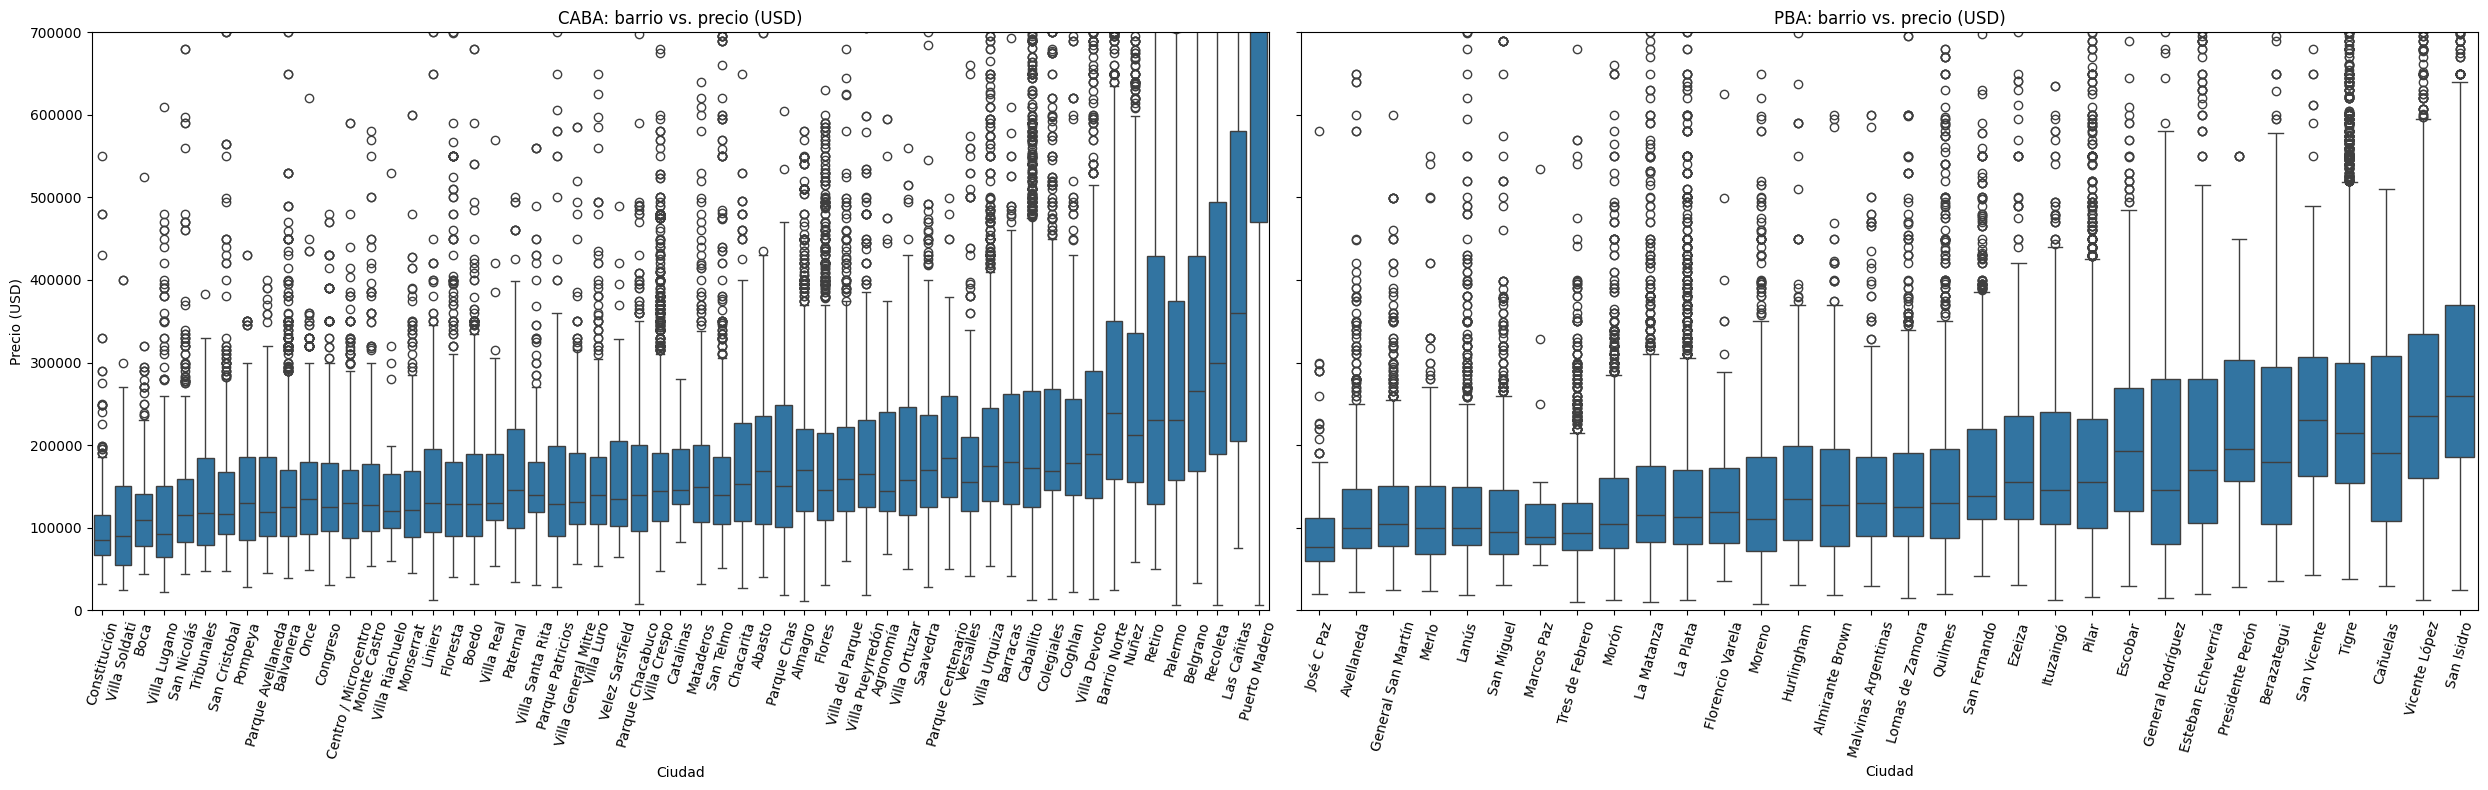

In [102]:



fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)

# Boxplot CABA
sns.boxplot(ax=axes[0], x="ciudad", y="precio", data=data_caba, order=data_caba_media.index)
axes[0].set_ylim(0, 500000)
axes[0].set_title("CABA: barrio vs. precio (USD)")
axes[0].set_xlabel("Ciudad")
axes[0].set_ylabel("Precio (USD)")
axes[0].tick_params(axis="x", rotation=75)

# Boxplot Sur
sns.boxplot(ax=axes[1], x="ciudad", y="precio", data=data_pba, order=data_pba_media.index)
axes[1].set_ylim(0, 700000)
axes[1].set_title("PBA: barrio vs. precio (USD)")
axes[1].set_xlabel("Ciudad")
axes[1].set_ylabel("")  # ya lo muestra el primer subplot
axes[1].tick_params(axis="x", rotation=75)

plt.tight_layout()
plt.show()

In [ ]:
#Hacer grafico de cantiddad de propiedasdes en venta por barrio
#grafico de los metros cuadrados por barrio

In [ ]:

# Extraigo un csv con los datos que considereo que influyen a la hora de determinar un precio

data_modelo = data[['provincia', 'ciudad',
 'ambientes', 'dormitorios', 'baños', 'superficie_total', 'superficie_cubierta',
 'precio', 'tipo_propiedad']]

data_modelo.to_csv("data_modelo.csv")
